In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('bike.csv')

In [2]:
df.head()

,ID,PARK_AREA_ACRES,CTA_BUS_STATIONS,CTA_TRAIN_STATIONS,BIKE_ROUTES,Limited_Business_License,Retail_Food_Establishment,CAPACITY,PER_CAPITA_INCOME,POPULATION_SQ_MILE,...,PROSTITUTION,PUBLIC_INDECENCY,PUBLIC_PEACE_VIOLATION,ROBBERY,SEX_OFFENSE,STALKING,THEFT,WEAPONS_VIOLATION,trips,i
0,5,998.35328,217,19,37.260009,419417,118269,19,65526,36691.00331,...,2.397895,1.386294,4.369448,5.752573,3.951244,1.609438,8.269501,3.044522,10.092826,33
1,13,1204.28480,152,6,23.544022,42998,27496,19,65526,26901.43828,...,0.693147,0.000000,2.564949,4.905275,2.708050,1.098612,7.312553,0.693147,10.350798,33
2,14,1135.55648,133,2,21.615016,57119,23273,15,65526,27738.26651,...,1.609438,0.000000,2.639057,3.688879,1.098612,1.386294,6.089045,2.397895,9.227001,33
3,15,1108.60416,146,2,17.309916,31090,14369,15,88669,28008.49477,...,1.609438,0.000000,3.178054,3.891820,1.945910,1.386294,6.171701,2.944439,9.279493,33
4,16,955.64416,153,3,15.953728,43002,19727,11,65526,24577.70577,...,0.693147,0.000000,2.302585,5.351858,2.564949,0.000000,7.658700,2.397895,9.846441,33


In [3]:
col = df.columns.values.tolist()
col.remove('trips')
col.remove('i')
col.remove('ID')
#col=['THEFT','BATTERY','ASSAULT','HOMICIDE']

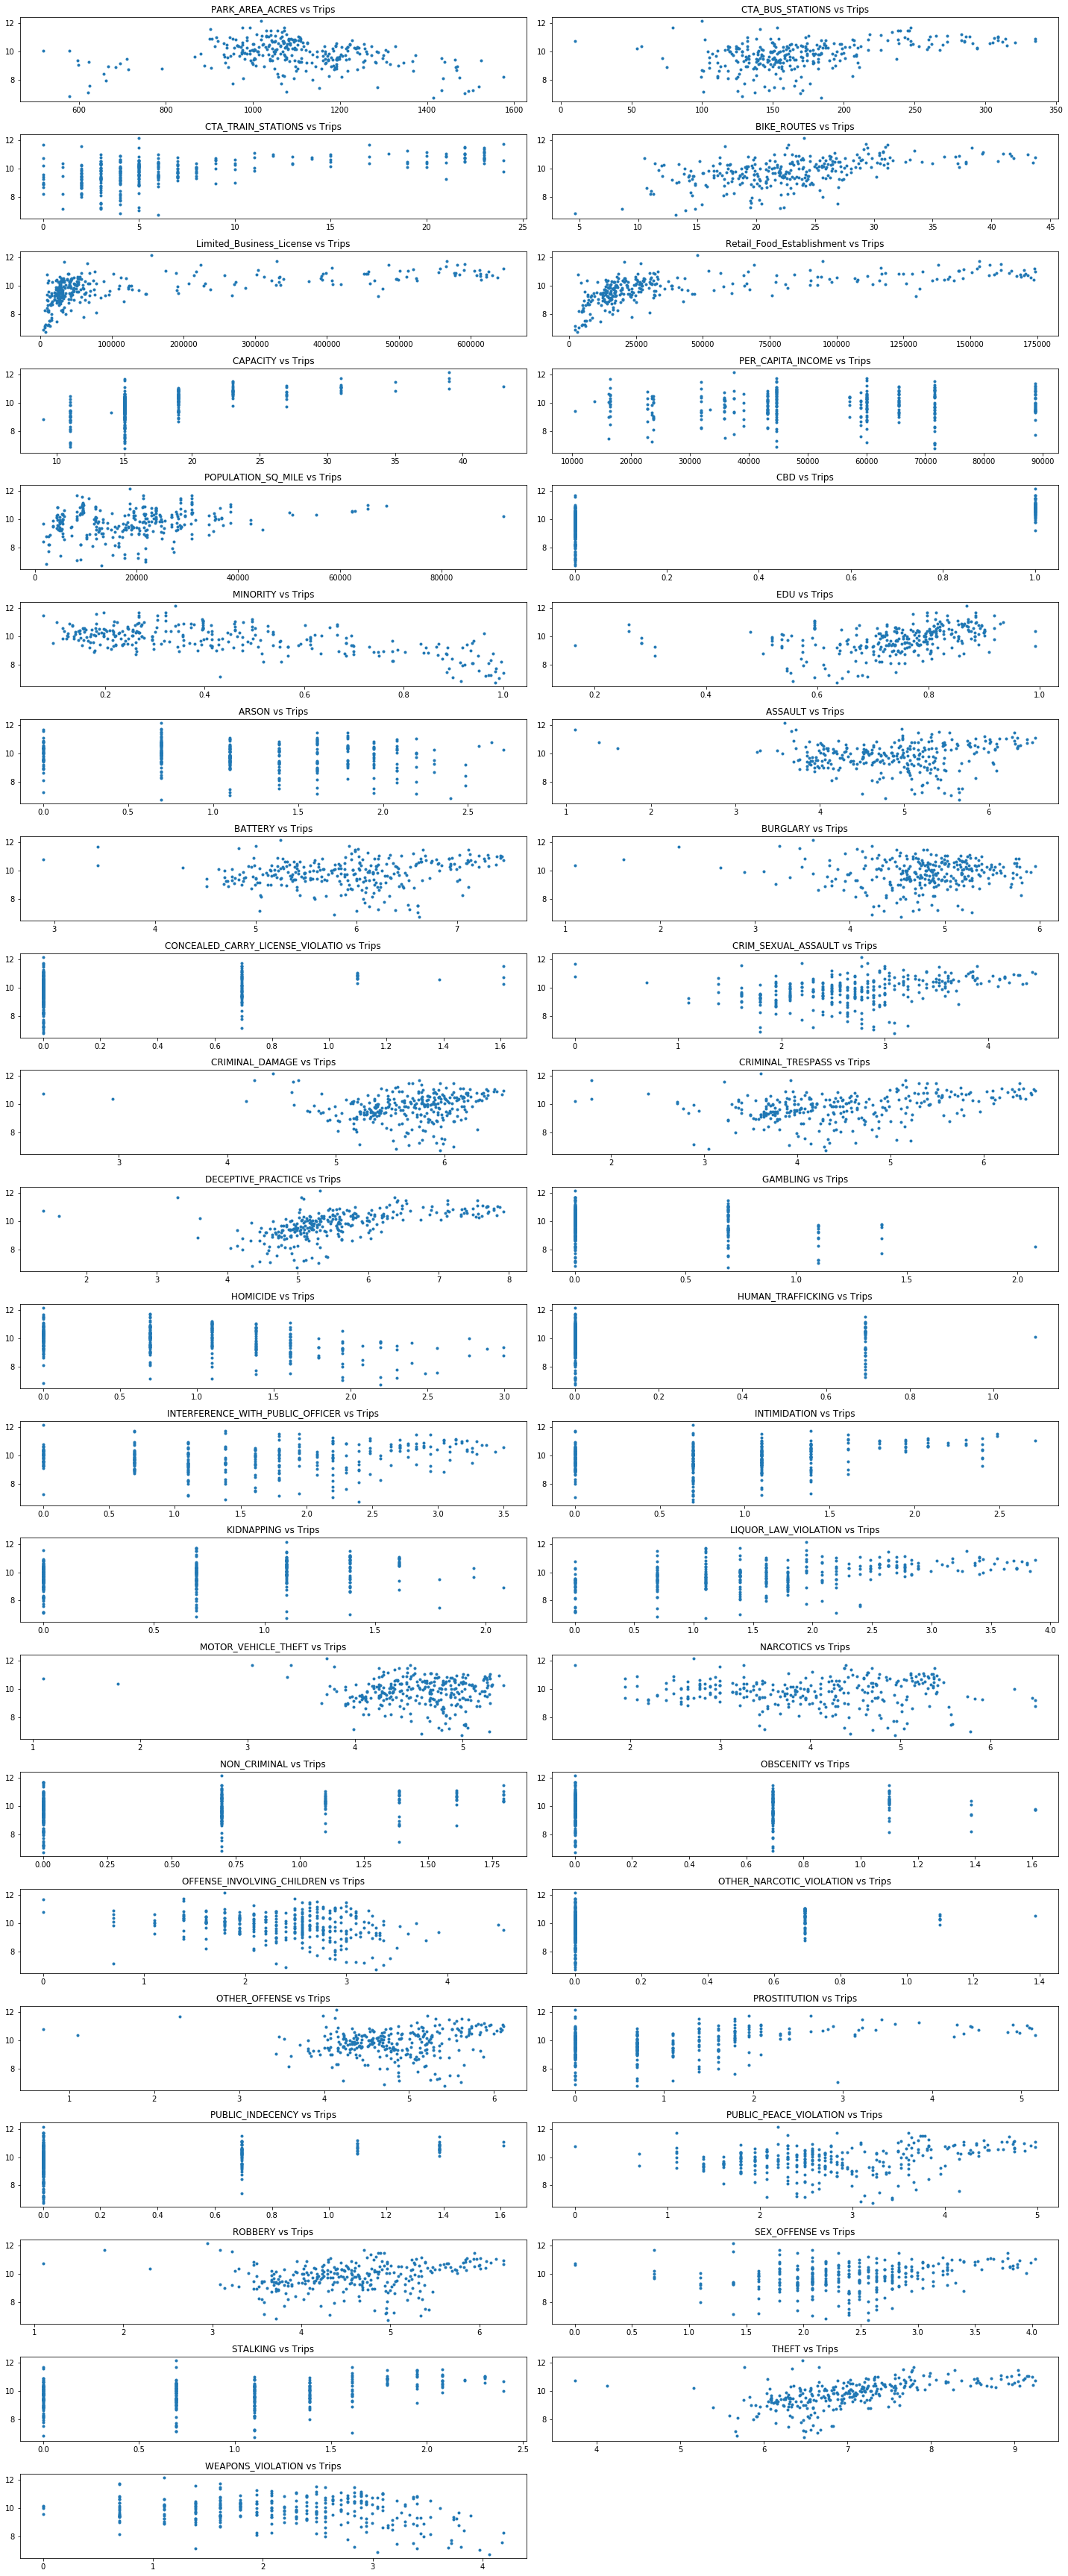

In [4]:
def plotFeatures(col_list,title):
    plt.figure(figsize=(20, 50))
    i = 0
    for col in col_list:
        i+=1
        plt.subplot(23,2,i)
        plt.plot(df[col], df["trips"],marker='.',linestyle='none')
        plt.title(title % (col))   
        plt.tight_layout()
        
plotFeatures(col,"%s vs Trips")

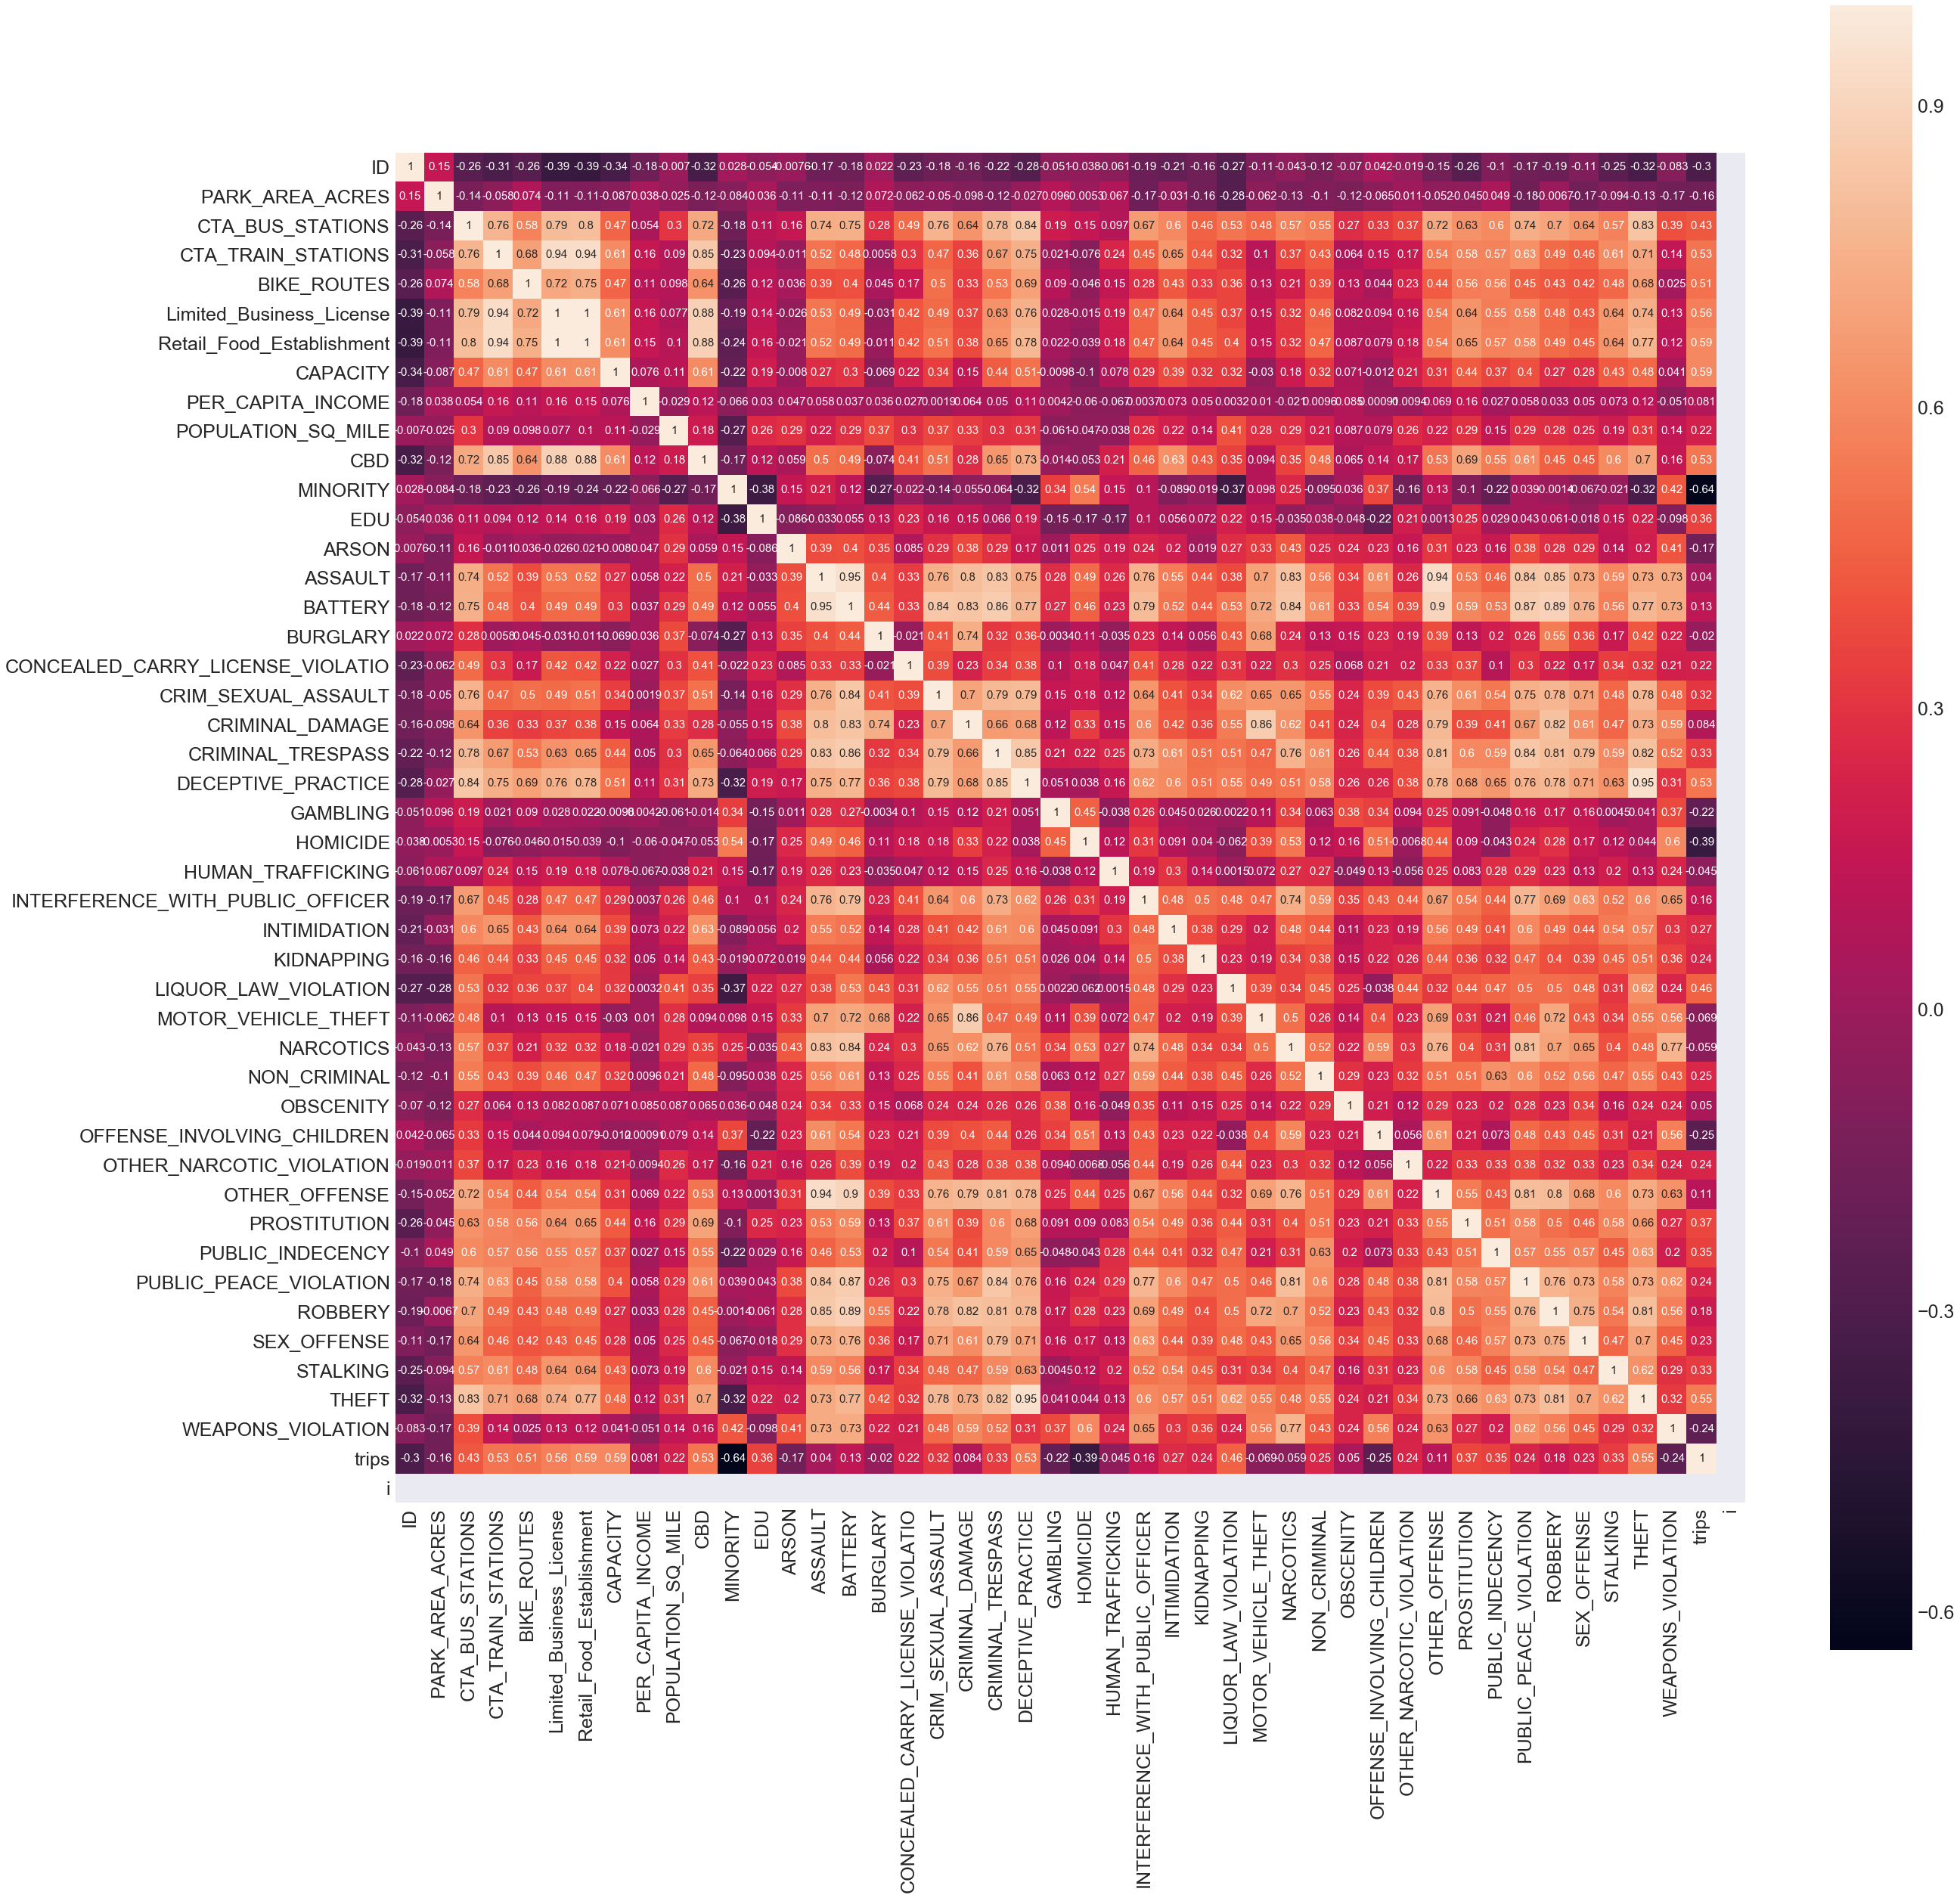

<Figure size 432x288 with 0 Axes>

In [103]:
import seaborn as sns

fig = plt.subplots(figsize = (40,40))
sns.set(font_scale=2.5)
sns.heatmap(df.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 15})
plt.show()
plt.savefig("correlation_matrix.jpg")

In [104]:
#Correlation with output variable
cor_target = abs(df.corr()['trips'])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

CTA_TRAIN_STATIONS           0.526220
BIKE_ROUTES                  0.511121
Limited_Business_License     0.560613
Retail_Food_Establishment    0.593184
CAPACITY                     0.594428
CBD                          0.526904
MINORITY                     0.636996
DECEPTIVE_PRACTICE           0.528705
THEFT                        0.551326
trips                        1.000000
Name: trips, dtype: float64

In [105]:
from patsy import dmatrices
features = "+".join(col)

# get y and X dataframes based on this regression:
y, X = dmatrices('trips ~' + features, df, return_type='dataframe')

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [107]:
vif.round(300)

,VIF Factor,features
0,906.481680,Intercept
1,2.088411,PARK_AREA_ACRES
2,11.862017,CTA_BUS_STATIONS
3,19.554868,CTA_TRAIN_STATIONS
4,5.436126,BIKE_ROUTES
5,1075.876361,Limited_Business_License
6,1210.651499,Retail_Food_Establishment
7,2.076806,CAPACITY
8,1.188513,PER_CAPITA_INCOME
9,1.830720,POPULATION_SQ_MILE


In [108]:
import statsmodels.api as sm

result = sm.OLS(y, X).fit()

In [109]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  trips   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     24.60
Date:                Wed, 29 May 2019   Prob (F-statistic):           1.09e-68
Time:                        14:40:24   Log-Likelihood:                -167.47
No. Observations:                 300   AIC:                             422.9
Df Residuals:                     256   BIC:                             585.9
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            9.3049      0.796     11.694      0.000       7.738      10.872
PARK_AREA_ACRES                     -0.0004      0.000     -1.840      0.067      -0.001    2.89e-05
CTA_BUS_STATIONS                    -0.0002      0.002     -0.096      0.923      -0.003       0.003
CTA_TRAIN_STATIONS                  -0.0297      0.018     -1.638      0.103      -0.065       0.006
BIKE_ROUTES                          0.0030      0.009      0.328      0.743      -0.015       0.021
Limited_Business_License          -2.75e-06   4.62e-06     -0.595      0.552   -1.18e-05    6.35e-06
Retail_Food_Establishment         2.124e-05   1.87e-05      1.138      0.256   -1.55e-05     5.8e-05
CAPACITY                             0.0394      0.007      5.558      0.000       0.025       0.053
PER_CAPITA_INCOME                 2.243e-07    1.4e-06      0.160      0.873   -2.53e-06    2.98e-06
POPULATION_SQ_MILE                5.752e-06   2.79e-06      2.060      0.040    2.53e-07    1.13e-05
CBD                                 -0.2580      0.183     -1.410      0.160      -0.618       0.102
MINORITY                            -1.2786      0.225     -5.671      0.000      -1.723      -0.835
EDU                                  0.4463      0.285      1.568      0.118      -0.114       1.007
ARSON                               -0.0815      0.058     -1.412      0.159      -0.195       0.032
ASSAULT                             -0.6931      0.205     -3.377      0.001      -1.097      -0.289
BATTERY                              0.6421      0.256      2.508      0.013       0.138       1.146
BURGLARY                            -0.0950      0.115     -0.829      0.408      -0.321       0.131
CONCEALED_CARRY_LICENSE_VIOLATIO    -0.0490      0.122     -0.401      0.689      -0.290       0.192
CRIM_SEXUAL_ASSAULT                 -0.1229      0.104     -1.178      0.240      -0.328       0.082
CRIMINAL_DAMAGE                     -0.9262      0.250     -3.701      0.000      -1.419      -0.433
CRIMINAL_TRESPASS                    0.0652      0.100      0.654      0.514      -0.131       0.262
DECEPTIVE_PRACTICE                  -0.1849      0.154     -1.201      0.231      -0.488       0.118
GAMBLING                            -0.2484      0.109     -2.284      0.023      -0.463      -0.034
HOMICIDE                            -0.0352      0.065     -0.544      0.587      -0.163       0.092
HUMAN_TRAFFICKING                    0.1499      0.140      1.074      0.284      -0.125       0.425
INTERFERENCE_WITH_PUBLIC_OFFICER     0.0315      0.064      0.496      0.620      -0.094       0.157
INTIMIDATION                        -0.0817      0.061     -1.335      0.183      -0.202       0.039
KIDNAPPING                          -0.0898      0.06

In [110]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

C:\Users\adija\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.


Add  Intercept                      with p-value 1.47923e-304
Add  MINORITY                       with p-value 1.50715e-35
Add  CAPACITY                       with p-value 1.50669e-31
Add  Retail_Food_Establishment      with p-value 1.09511e-10
Add  PARK_AREA_ACRES                with p-value 5.58945e-06
Add  BURGLARY                       with p-value 2.95286e-05
Add  THEFT                          with p-value 3.94969e-06
Drop Retail_Food_Establishment      with p-value 0.406402
Add  ASSAULT                        with p-value 5.8114e-07


C:\Users\adija\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Add  EDU                            with p-value 0.045487
resulting features:
['Intercept', 'MINORITY', 'CAPACITY', 'PARK_AREA_ACRES', 'BURGLARY', 'THEFT', 'ASSAULT', 'EDU']


In [5]:
from patsy import dmatrices
features = "+".join(col)

# get y and X dataframes based on this regression:
y, X = dmatrices('trips ~' + features, df, return_type='dataframe')

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

regressor = DecisionTreeRegressor(random_state=0)
#cross_val_score(regressor, X, y, cv=10)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor.fit(x_train,y_train)
#regressor.score(x_test, y_test)
predict = regressor.predict(x_test)
r2_score(y_test, predict)

0.5577019778571319

In [9]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=20, random_state=0, n_estimators=200)
regr.fit(x_train,y_train.values.ravel()) 
predict = regr.predict(x_test)
print(regr.feature_importances_)
r2_score(y_test, predict)


[0.00000000e+00 1.57670715e-02 1.20135947e-02 6.07599340e-03
 1.48739744e-02 2.21910661e-02 1.41198056e-01 4.72569822e-02
 6.57261221e-03 1.36439237e-02 1.28350303e-03 3.76371141e-01
 1.78013313e-02 5.82655715e-03 6.38394341e-03 4.64665723e-03
 1.32640326e-02 5.08967286e-04 5.36245349e-03 6.79763671e-03
 5.23521178e-03 6.14421450e-02 1.04668796e-03 5.09999272e-03
 2.88733657e-03 3.59996043e-03 2.74291111e-03 2.42096935e-03
 4.05673198e-02 1.03531380e-02 7.12771381e-03 1.11898628e-03
 1.05849786e-03 1.89735432e-02 5.77097235e-04 5.99826839e-03
 5.95892104e-03 1.54815372e-04 5.47796460e-03 9.23706030e-03
 8.50147879e-03 4.25620871e-03 7.24293208e-02 5.89495348e-03]


0.734148902746335

In [121]:
from sklearn.ensemble import GradientBoostingRegressor

regr = GradientBoostingRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(x_train,y_train.values.ravel()) 
predict = regr.predict(x_test)
print(regr.feature_importances_)
r2_score(y_test, predict)

[0.         0.04092692 0.01790935 0.00343003 0.03421158 0.01308093
 0.08899085 0.04850352 0.00082929 0.02456775 0.         0.11740903
 0.07798249 0.0162936  0.02067842 0.0191556  0.03541533 0.00957331
 0.02170219 0.04715516 0.00300636 0.02201368 0.00258859 0.02291989
 0.02264027 0.00520035 0.01178331 0.00411193 0.0236968  0.02761387
 0.06642832 0.         0.0175129  0.00439232 0.         0.03463333
 0.00390948 0.         0.00063488 0.01126094 0.00286184 0.00210688
 0.06070489 0.01216385]


0.8153291452686617